# Practical session 2 - Practise with classic libraries

Students (pair):
- [Duboux Jean-Paul]([link](https://github.com/Eclil))
- [Wang Céline]([link](https://github.com/cessounette))

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [1]:
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [2]:
# your code
import numpy as np
import random

random.seed(12345)
print(random.random())

0.41661987254534116


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [3]:
# your code
sample = np.random.gamma(9,1/2,100000)

np.save("sample",sample)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

Text(0.5, 1.0, 'Density of a random sample')

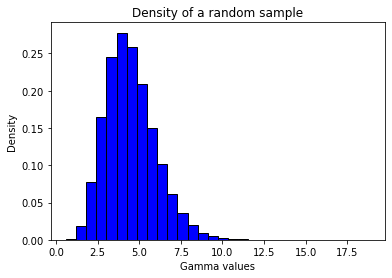

In [4]:
# your code
import matplotlib.pyplot as plt

# We choose a number of bins superior to Sturge's rule value 1 + log2(n) = 18
# to be precise, but not to high to still be readable, 30 appears to be good enough 

plt.hist(sample,30,color = 'blue', edgecolor = 'black', density = True)
plt.xlabel("Gamma values")
plt.ylabel("Density")
plt.title("Density of a random sample")

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

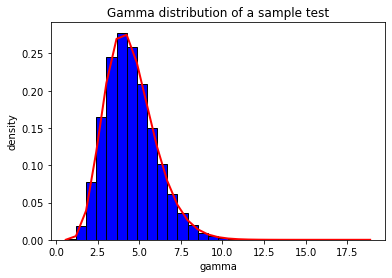

In [5]:
# your code
from scipy.stats import gamma
fig, ax = plt.subplots(1, 1)

a,b = 9,2

count, bins, ignored = ax.hist(sample,30, color = 'blue', edgecolor = 'black', density = True)

ax.plot(bins, gamma.pdf(bins, a, 0, 1/b),
       'r-', lw=2, label='gamma pdf')

plt.xlabel("gamma")
plt.ylabel("density")
plt.title("Gamma distribution of a sample test")

plt.savefig("Gamma.png")
plt.show()

The shape of the pdf is matching our histogram, which is quite obvious since we generated both of them thanks to the numpy module's gamma function.

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [6]:
# your code
import pandas as pd
data = pd.read_csv("data\data.csv")

x = data.X 
y = data.Y

xmedian = x.median()
xmean = x.mean()
xvar = x.var()
xstd = x.std()

print('Xmedian:', xmedian, 'Xmean:', xmean, 'X_var:', xvar, 'X_std:', xstd)

ymedian = y.median()
ymean = y.mean()
yvar = y.var()
ystd = y.std()

print('Ymedian:', ymedian, 'Ymean:', ymean, 'Y_var:', yvar, 'Y_std:', ystd)

data.sort_values("X")


Xmedian: 180.5 Xmean: 153.75 X_var: 3486.0227272727275 X_std: 59.04255014201815
Ymedian: 24.0 Ymean: 25.916666666666668 Y_var: 42.446969696969695 Y_std: 6.5151338970868204


,X,Y
4,56,37
6,68,34
7,98,25
8,110,36
1,128,28
2,180,24
10,181,20
0,190,24
5,192,22
9,197,24


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [7]:
# your code
data_np = data.to_numpy()
coeffs = np.polyfit(data_np[:,0],data_np[:,1],1)

print(coeffs)


[-0.09816475 41.0094968 ]


Y = -0.09816475*X + 41.0094968

3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

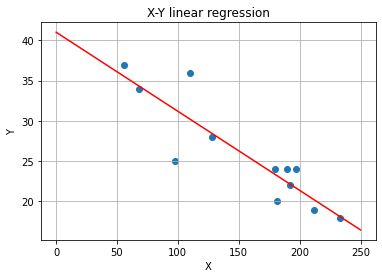

In [8]:
# your code
plt.figure()

X = np.linspace(0,250,2)
Y = coeffs[0]*X + coeffs[1]

plt.plot(X,Y,'r')
plt.scatter(data_np[:,0], data_np[:,1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X-Y linear regression")
plt.grid()

plt.savefig("X-Y regresion.png")
plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [9]:
# your code

def gradient2D (X):
    nX = np.copy(X)
    assert len(np.shape(nX)) <= 2, "Matrix dimension is above 2 !"
    
    XDh = np.diff(nX)
    DvX = np.diff(nX.T)

    if(len(XDh) != 0):
        XDh = np.c_[XDh,np.zeros(len(nX))]
        DvX = np.c_[DvX,np.zeros(len(nX.T))].T
    else: # 1x1 matrix case
        XDh = [0]
        DvX = [0]
    
    D = (XDh,DvX)

    return D


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the functioni s evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [10]:
# your code
%run -m pytest tests/test_grad_unittest.py

============================= test session starts =============================
platform win32 -- Python 3.9.7, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: c:\Users\Jp190\Documents\Centrale Lille\S9\SDI\Python\python_sdia\Labs\Lab2
plugins: anyio-2.2.0
collected 4 items

tests\test_grad_unittest.py ....                                         [100%]

============================== warnings summary ===============================
..\..\..\..\..\..\..\..\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8
  c:\Users\Jp190\anaconda3\lib\site-packages\pyreadline\py3k_compat.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
    return isinstance(x, collections.Callable)

-- Docs: https://docs.pytest.org/en/stable/warnings.html
======================== 4 passed, 1 warning in 0.05s =========================


3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [11]:
# your code

def gradient2D (X):
    """_summary_ 
    Computes the 2D discrete gradient operator of a 2D matrix and returns the resulting tuple (XDh, DvX)

    :param X: a matrix of complex numbers
    :type X: np.array
    :raises AssertionError: if X has more than 2 dimensions
    :return: returns the 2D discrete gradient operator of the matrix X.
    Which is a couple of two other matrixes (XDh & DvX) defined following the formulas above
    :rtype: tuple(np.array,np.array)
    
    """
    nX = np.copy(X)
    assert len(np.shape(nX)) <= 2, "Matrix dimension is above 2 !"
    
    XDh = np.diff(nX)
    DvX = np.diff(nX.T)

    if(len(XDh) != 0):
        XDh = np.c_[XDh,np.zeros(len(nX))]
        DvX = np.c_[DvX,np.zeros(len(nX.T))].T
    else: # 1x1 matrix case
        XDh = [0]
        DvX = [0]
    
    D = (XDh,DvX)

    return D


4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [12]:
# your code

def tv(X):
    """_summary_ 
    Compute the discrete isotopic total variation of a complex matrix.

    Args:
        X (np.array): a matrix of complex values.

    Returns:
        TV (complex): the discrete isotopic total variation of X.
    """
    D = gradient2D(X)
    XDh = D[0]
    DvX = D[1]

    TV = 0

    for i in range(len(X)) :
        for j in range(len(X[0])) :
            TV += np.sqrt(XDh[i][j]**2 + DvX[i][j]**2)

    return TV

%run -m pytest tests/test_tv_unittest.py

============================= test session starts =============================
platform win32 -- Python 3.9.7, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: c:\Users\Jp190\Documents\Centrale Lille\S9\SDI\Python\python_sdia\Labs\Lab2
plugins: anyio-2.2.0
collected 3 items

tests\test_tv_unittest.py ...                                            [100%]

============================== 3 passed in 0.04s ==============================


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

/!\ Even though it is computable by the function gradient2D_adjoint, we won't work with 1x1, 2x1 and 1x2 matrices considering that the 2.6 formulas are false in these cases.

In [13]:
# your code
def gradient2D_adjoint (Yh,Yv):
    nYh = np.copy(Yh) # Yh copy
    nYv = np.copy(Yv) # Yv copy

    YhDh = []
    DvYv = []

    assert (nYh.shape == nYv.shape), "Yh and Yv dimensions are not equal!"
    assert (nYh.shape[0] != 1 or nYh.shape[1] != 1), "Unable to use the formulas with scalars. Ex: X = 1, Yh = 1, Yv = 2 -> 0 = -3!"
    assert (nYh.shape[0] != 2 or nYh.shape[1] != 1), "Unable to use the formulas with 2x1 matrix!"
    assert (nYh.shape[0] != 1 or nYh.shape[1] != 2), "Unable to use the formulas with 1x2 matrix!"

    if (nYh.shape[0] == 1 & nYh.shape[1] == 1): # 1x1 matrix case, but we will never use it because of the 2.6 formulas that are only working for 2x2 matrices and above

      YhDh = np.array([-nYh[0]])

    else:  
            
      nYh1 = nYh[:,0] # We save Yh's first column
      nYhN = nYh[:,len(nYh[0])-2] # We save Yh's before last column

      YhDh = np.diff(nYh) # We compute the intermediary columns
      if(len(YhDh[0])-1 > 0): # We make sure they exist
                YhDh = np.c_[-nYh1,-YhDh[:,:len(YhDh[0])-1]] # If yes, we add them after the first column
      else:
                YhDh = np.array([-nYh1]).T # Else, we only keep the first column
    
      YhDh = np.c_[YhDh,nYhN] # We add the before last column to obtain the final result
    

    if (nYv.shape[0] == 1 & nYv.shape[1] == 1): # 1x1 matrix case, but we will never use it because of the 2.6 formulas that are only working for 2x2 matrices and above

      DvYv = np.array([-nYv[0]])

    else :  

      nYv1 = nYv[0,:] # We save Yv's first row
      nYvN = nYv[len(nYv)-2,:] # We save Yv's before last column
    
      DvYv = (np.diff(nYv.T)).T # We compute the intermediary rows
      if(len(DvYv)-1 > 0): # We make sure they exist
          DvYv = np.c_[-nYv1,-DvYv[:len(DvYv)-1,:].T].T # If yes, we add them after the first row
      else:
          DvYv = np.array([-nYv1]) # Else, we only keep the first row
      
      DvYv = np.c_[DvYv.T,nYvN].T # We add the before last row to obtain the final result


    return YhDh + DvYv # We add the two resulting matrices


6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [16]:
# your code
%run -m pytest tests/test_adjoint_unittest.py

============================= test session starts =============================
platform win32 -- Python 3.9.7, pytest-6.2.4, py-1.10.0, pluggy-0.13.1
rootdir: c:\Users\Jp190\Documents\Centrale Lille\S9\SDI\Python\python_sdia\Labs\Lab2
plugins: anyio-2.2.0
collected 10 items

tests\test_adjoint_unittest.py ..........                                [100%]

============================= 10 passed in 0.09s ==============================


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [15]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
